따릉이 대여량 예측 AI 해커톤 *https://dacon.io/competitions/open/235576/data*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


* id : 고유 id
* hour : 시간
* hour_bef_temperature : 기온
* hour_bef_precipitation : 비 오지 않으면 0, 비 오면 1
* hour_bef_windspeed : 풍속(평균)
* hour_bef_humidity : 습도
* hour_bef_visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* hour_bef_ozone : 오존
* hour_bef_pm10 : 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* hour_bef_pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수


### 결측치 처리

In [ ]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [ ]:
train[train['hour_bef_temperature'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# train = train.dropna(subset='hour_bef_temperature')
# 결측치가 많아 제거했다가 test에도 비슷한 경우가 있어 남겨둠

In [ ]:
train[train['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


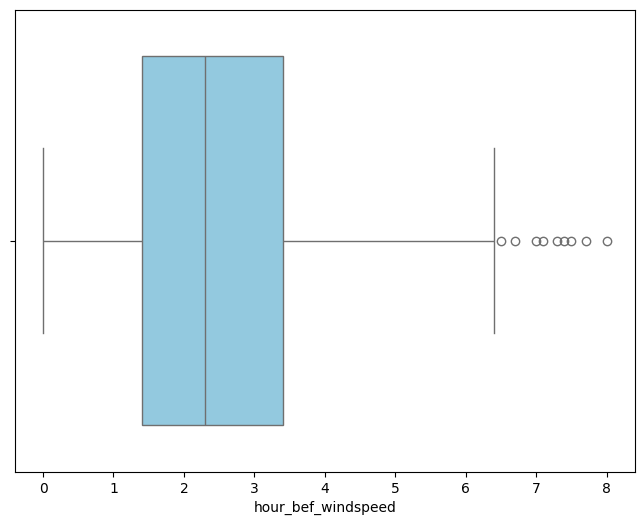

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['hour_bef_windspeed'], color='skyblue')
plt.xlabel('hour_bef_windspeed')
plt.show()

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1459.0,1105.914325,631.338681,3.000,555.5000,1115.000,1651.000,2179.000
hour,1459.0,11.493489,6.922790,0.000,5.5000,11.000,17.500,23.000
hour_bef_temperature,1457.0,16.717433,5.239150,3.100,12.8000,16.600,20.100,30.000
hour_bef_precipitation,1457.0,0.031572,0.174917,0.000,0.0000,0.000,0.000,1.000
hour_bef_windspeed,1450.0,2.479034,1.378265,0.000,1.4000,2.300,3.400,8.000
hour_bef_humidity,1457.0,52.231297,20.370387,7.000,36.0000,51.000,69.000,99.000
hour_bef_visibility,1457.0,1405.216884,583.131708,78.000,879.0000,1577.000,1994.000,2000.000
hour_bef_ozone,1383.0,0.039149,0.019509,0.003,0.0255,0.039,0.052,0.125
hour_bef_pm10,1369.0,57.168736,31.771019,9.000,36.0000,51.000,69.000,269.000
hour_bef_pm2.5,1342.0,30.327124,14.713252,8.000,20.0000,26.000,37.000,90.000


In [ ]:
train['hour_bef_precipitation'] = train['hour_bef_precipitation'].fillna(0)

for i in range(2, 10):
    train[train.columns[i]] = train[train.columns[i]].fillna(value=train[train.columns[i]].median())

train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [ ]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


### 데이터 분포

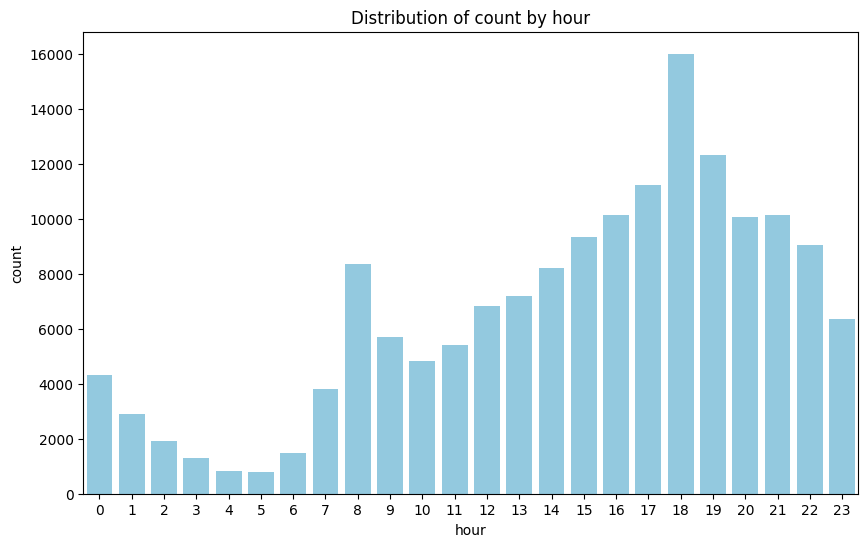

In [ ]:
df_grouped = train.groupby(train['hour'])['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=df_grouped, color='skyblue')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Distribution of count by hour')
plt.xticks(df_grouped['hour'])
plt.show()

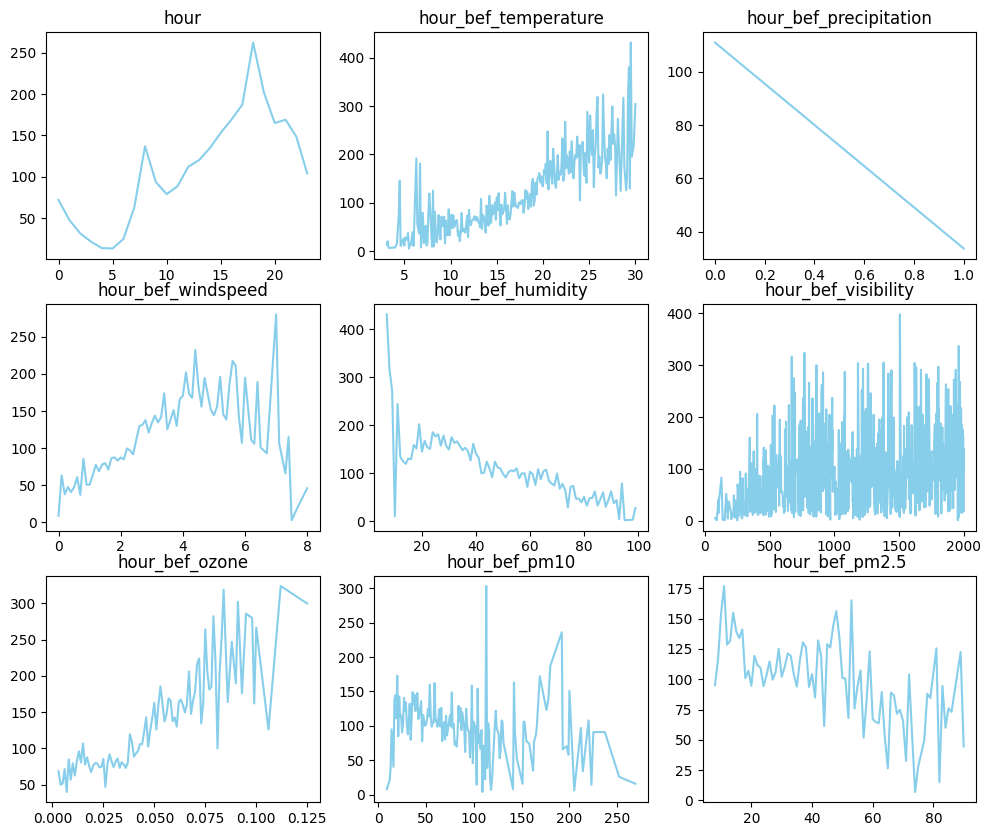

In [ ]:
plt.figure(figsize=(12, 10))

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.title(train.columns[i])
    df = train.groupby([train.columns[i]])['count'].mean().to_frame().reset_index()
    sns.lineplot(x=train.columns[i], y='count', data= df, color='skyblue')
    plt.xlabel(None)
    plt.ylabel(None)
plt.show()

<Axes: >

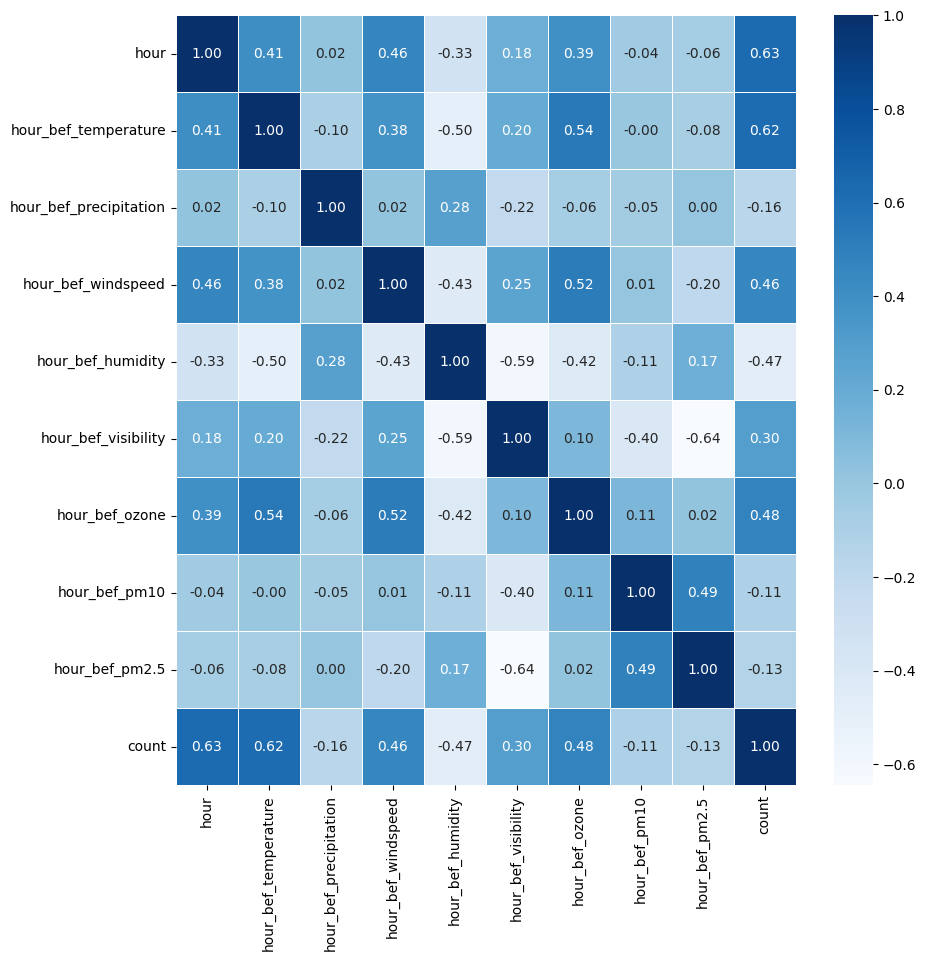

In [ ]:
df_corr = train.drop(['id'], axis=1)

plt.figure(figsize=(10,10))
sns.heatmap(data = df_corr.corr(), annot=True, cmap='Blues', fmt = '.2f', linewidths=.5)

In [ ]:
train.to_csv('new_train.csv', index=False)

### test
*https://dacon.io/competitions/open/235576/codeshare/4159?page=1&dtype=recent*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# train = pd.read_csv('/content/sample_data/new_train.csv')
# test = pd.read_csv('/content/sample_data/new_test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

In [ ]:
pred = model.predict(test)

In [ ]:
submission = pd.read_csv('submission.csv')

In [ ]:
submission['count'] = pred

In [ ]:
submission.to_csv('pred.csv',index = False)

In [ ]:
# !pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train = pd.read_csv('new_train.csv')

X = train.drop(['id', 'count'], axis=1)
y = train['count']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_state=42)
model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100, early_stopping_rounds=50)

0:	learn: 77.6359056	test: 80.9950317	best: 80.9950317 (0)	total: 8.89ms	remaining: 8.88s
100:	learn: 30.6759596	test: 38.0415043	best: 38.0372955 (99)	total: 351ms	remaining: 3.12s
200:	learn: 22.5739568	test: 37.0740068	best: 37.0498008 (199)	total: 684ms	remaining: 2.72s
300:	learn: 17.6822115	test: 36.8252085	best: 36.8252085 (300)	total: 914ms	remaining: 2.12s
400:	learn: 14.4606125	test: 36.5262111	best: 36.5203307 (399)	total: 1.15s	remaining: 1.72s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 36.41948689
bestIteration = 412

Shrink model to first 413 iterations.


In [ ]:
test = pd.read_csv('new_test.csv')
X_test = test.drop(['id'], axis=1)
predictions = model.predict(X_test)


submission = pd.DataFrame({'id': test['id'], 'count': predictions})
submission.to_csv('submission_catboost.csv', index=False)

y_val_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
print("Validation Set RMSE:", rmse)


Validation Set RMSE: 36.41948689237958


RandomForestRegressor: 44.9519792481            
CatBoostRegressor: 49.425959658